In [26]:
from ultralytics import YOLO
import os 

os.chdir("G:/mmdetection-master/mmdetection-master/mmdet/datasets/data/sennet/")
os.listdir()

['checkpoints',
 'coco.yaml',
 'runs',
 'sample_submission.csv',
 'test',
 'the-training-image-is-1024-x-1024 (1).ipynb',
 'the-training-image-is-1024-x-1024.ipynb',
 'tmp.tif',
 'train',
 'train_rles.csv',
 'wandb',
 'yolo-coco.yaml',
 'yolov8m-seg.pt',
 'yolov8n-seg.pt',
 'yolov8n.pt',
 'yolov8_hyp.yaml']

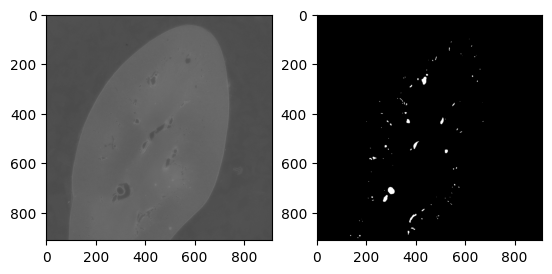

In [2]:
folder = "kidney_1_dense_yolo"
img = f'G:\mmdetection-master\mmdetection-master\mmdet\datasets\data/sennet/train/{folder}/images/0481_up.tif'
label = f'G:\mmdetection-master\mmdetection-master\mmdet\datasets\data/sennet/train/{folder}/labels/0481_up.txt'
mask = f'G:\mmdetection-master\mmdetection-master\mmdet\datasets\data/sennet/train/{folder}/labels/0481_up.tif'
import cv2
img_data = cv2.imread(img)
mask_data = cv2.imread(mask)
img_data.shape, mask_data.shape
from matplotlib import pyplot as plt
plt.subplot(121);plt.imshow(img_data)
plt.subplot(122);plt.imshow(mask_data)

In [3]:
import torch
import torchvision

device = 'cuda'
boxes = torch.tensor([[0., 1., 2., 3.]]).to(device)
scores = torch.randn(1).to(device)
iou_thresholds = 0.5

print(torchvision.ops.nms(boxes, scores, iou_thresholds))


tensor([0], device='cuda:0')


In [4]:
from glob import glob

labels = glob("./train/kidney_1_dense_yolo/labels/*.txt")
import shutil
for file in labels:
    shutil.copyfile(file, file.replace("labels","images"))

KeyboardInterrupt: 

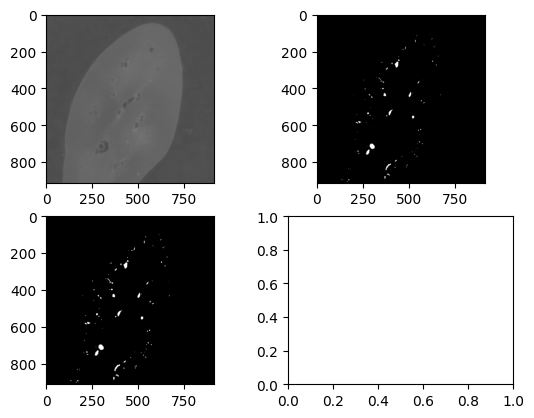

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.subplot(2,2,1);plt.imshow(img_data)
plt.subplot(2,2,2);plt.imshow(mask_data)
fr = open(label)

recovered = np.zeros(img_data.shape)
for line in fr.readlines():
    polygon = [float(x)*912.0 for x in line.split()[1:]]
    cv2.fillPoly(recovered, pts=np.int32(np.array(polygon).reshape(1, -1, 2)),color=(1,1,1))
plt.subplot(2,2,3);plt.imshow(recovered)
plt.subplot(2,2,4);


In [4]:
import os
os.listdir()

['analysis_tools',
 'convert_coco.ipynb',
 'convert_sennet.ipynb',
 'dataset_converters',
 'deployment',
 'dist_test.sh',
 'dist_train.sh',
 'misc',
 'model_converters',
 'show_result.ipynb',
 'show_result_sennet.ipynb',
 'slurm_test.sh',
 'slurm_train.sh',
 'test.py',
 'train.py',
 'yolov8_hyp.yaml',
 'yolov8_train.ipynb',
 'yolov8_train.py']


image 1/1 G:\mmdetection-master\mmdetection-master\mmdet\datasets\data\sennet\train\kidney_3_sparse\images\0600.tif: 1312x1184 38 blood_vessels, 15.0ms
Speed: 8.0ms preprocess, 15.0ms inference, 2.0ms postprocess per image at shape (1, 3, 1312, 1312)


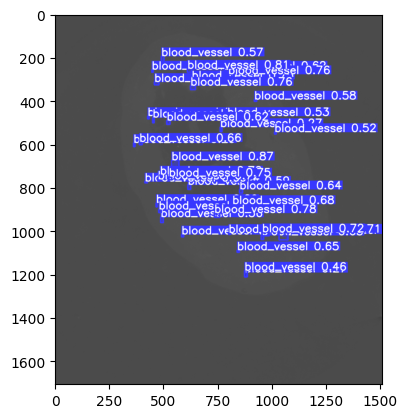

In [30]:
from ultralytics import YOLO
model = YOLO("G:/mmdetection-master/mmdetection-master/mmdet/datasets/data/sennet/runs/segment/train31/weights/last.pt")
ret = model.predict(img)
history = ret[0]
image = history.plot()
plt.imshow(image)


In [17]:
ret[0].masks.data.cpu().numpy().shape

(19, 928, 832)

C:\Users\Menghao\AppData\Local\Temp\ipykernel_33440\677909445.py:11: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tiff.imsave("tmp.tif", img_data)

image 1/1 G:\mmdetection-master\mmdetection-master\mmdet\datasets\data\sennet\tmp.tif: 1312x1184 38 blood_vessels, 66.8ms
Speed: 12.0ms preprocess, 66.8ms inference, 15.9ms postprocess per image at shape (1, 3, 1312, 1312)


(38, 1312, 1184)


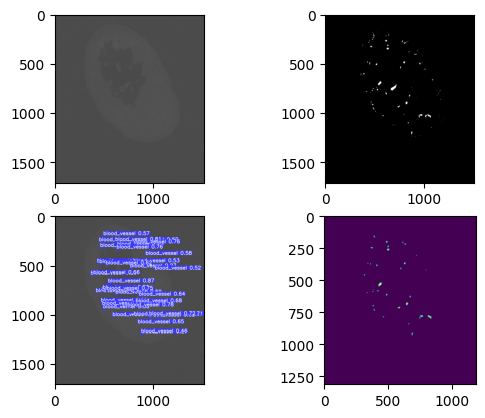

In [33]:

img = f'G:\mmdetection-master\mmdetection-master\mmdet\datasets\data/sennet/train/kidney_3_sparse/images/0600.tif'
# label = f'G:\mmdetection-master\mmdetection-master\mmdet\datasets\data/sennet/train/kidney_3_sparse/labels/0600.txt'
mask = f'G:\mmdetection-master\mmdetection-master\mmdet\datasets\data/sennet/train/kidney_3_sparse/labels/0600.tif'
img_data = cv2.imread(img)
mask_data = cv2.imread(mask)
plt.subplot(2,2,1);plt.imshow(img_data)
plt.subplot(2,2,2);plt.imshow(mask_data)

import tifffile as tiff
test_name = "tmp.tif"
tiff.imsave("tmp.tif", img_data)
from ultralytics import YOLO
model = YOLO("G:/mmdetection-master/mmdetection-master/mmdet/datasets/data/sennet/runs/segment/train31/weights/last.pt")
results = model.predict("tmp.tif")#, conf=0.05,retina_masks=True,stream=True)
result = results[0]#[]
# for res in results:
#     result = res
#     break
image = result.plot()
plt.subplot(2,2,3);plt.imshow(image)
plt.imshow(image)
def add_masks(masks):
    result = 255*(np.sum(masks, axis=0))
    result = result.clip(0, 255).astype("uint8")
    return result

print(result.masks.data.cpu().numpy().shape)
mask1 = add_masks(result.masks.data.cpu().numpy())

plt.subplot(2,2,4);plt.imshow(mask1)
# fr = open(label)
# recovered = np.zeros(img_data.shape)
# for line in fr.readlines():
#     polygon = [float(x) for x in line.split()[1:]]
#     polygon = np.array(polygon).reshape(1, -1, 2)
#     polygon[:,:,0] *= 912.0
#     polygon[:,:,1] *= 1303.0
#     cv2.fillPoly(recovered, pts=np.int32(polygon),color=(1,1,1))
# plt.subplot(2,2,4);